In [1]:
#coding:utf-8
import numpy as np
import time
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
import seaborn as sns
import os

myfont=FontProperties(fname=r'/home/zqz/.local/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/simhei.ttf',size=10)

mpl.rcParams['font.family'] = 'SimHei' #用来正常显示中文标签
mpl.rcParams['font.sans-serif'] =  ['SimHei']
#plt.rcParams['font.size'] = 20
#plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
sns.set(font=myfont.get_name())
path = "../preprocess/data/"
data = pd.read_csv(path+'quantityData.csv', encoding='gbk')
data = data[data['salary_min']<10000000][data['salary_max']<10000000]
middata = pd.read_csv(path+'middleData.csv', encoding='gbk')
middata = middata[middata['salary_min']<10000000][middata['salary_max']<10000000]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [2]:
# load preprocessed data
data

,company_people,education,work_experience,hire_num,salary_min,salary_max,area_上海,area_东莞,area_佛山,area_其他,...,job_work_type_网站,job_work_type_系统,job_work_type_项目,job_work_type_医,job_work_type_测试,job_work_type_翻译,job_work_type_运营,job_work_type_首席,job_work_type_前端,job_work_type_SEO
0,150,2,0.0,5,48000,96000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,1,1.0,1,120000,192000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,50,4,0.0,3,54000,72000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,2.0,1,120000,240000,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,50,3,0.0,1,60000,120000,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,2,1.0,2,60000,120000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,150,2,3.5,2,96000,240000,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,150,4,0.0,5,72000,144000,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,1000,2,0.0,8,60000,80000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,3,0.0,10,48000,180000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


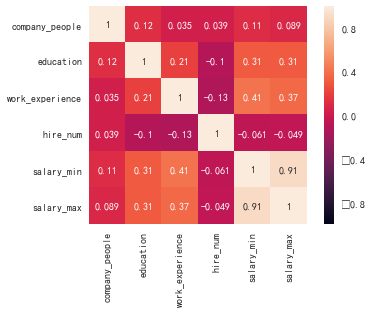

In [3]:
# calculate correlation matrix
# select numerailiazed features
main_data = data[['company_people','education','work_experience','hire_num','salary_min','salary_max']]
pearson = main_data.corr()
kendall = main_data.corr('kendall')
spearman = main_data.corr('spearman')
plt.plot(figsize = (6,6))  

sns.heatmap(pearson, annot=True, vmax=1,vmin = -1, square=True)
plt.savefig('pics1/pearson.pdf')

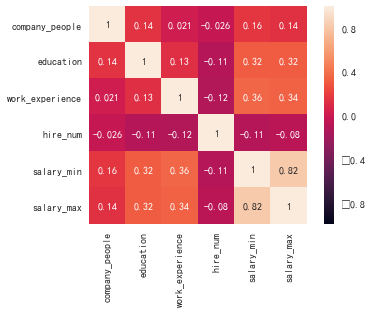

In [4]:
sns.heatmap(kendall, annot=True, vmax=1,vmin = -1, square=True)
plt.savefig('pics1/kendall.pdf')

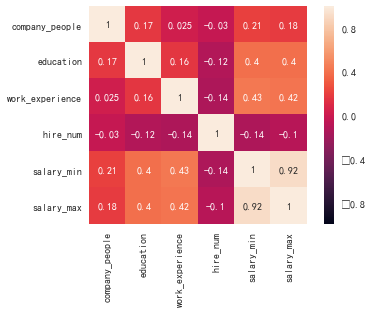

In [5]:
sns.heatmap(spearman, annot=True, vmax=1,vmin = -1, square=True)
plt.savefig('pics1/spearman.pdf')

In [6]:
# see all columns
for i in data.columns:
    print("\'"+i+"\',", end='')

'company_people','education','work_experience','hire_num','salary_min','salary_max','area_上海','area_东莞','area_佛山','area_其他','area_北京','area_合肥','area_嘉兴','area_国外','area_天津','area_宁波','area_广东','area_广州','area_惠州','area_无锡','area_昆山','area_杭州','area_武汉','area_深圳','area_珠海','area_西安','area_香港','area_detail_no detail','area_detail_上城区','area_detail_下城区','area_detail_东城区','area_detail_丰台区','area_detail_临安区','area_detail_从化','area_detail_余杭区','area_detail_光明新区','area_detail_南山区','area_detail_南沙区','area_detail_嘉定区','area_detail_坪山区','area_detail_增城','area_detail_大兴区','area_detail_大鹏新区','area_detail_天河区','area_detail_奉贤区','area_detail_宝安区','area_detail_宝山区','area_detail_密云区','area_detail_富阳区','area_detail_崇明区','area_detail_平谷区','area_detail_延庆区','area_detail_建德市','area_detail_徐汇区','area_detail_怀柔区','area_detail_房山区','area_detail_拱墅区','area_detail_昌平区','area_detail_普陀区','area_detail_朝阳区','area_detail_杨浦区','area_detail_松江区','area_detail_桐庐县','area_detail_江干区','area_detail_浦东新区','area_detail_海淀

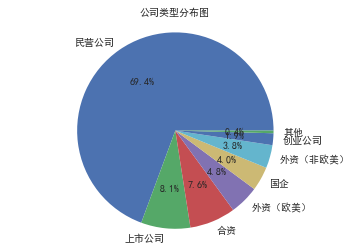

In [7]:
# pie chart of distribution of company type
company_type = [u'company_type_上市公司', u'company_type_事业单位', u'company_type_创业公司', u'company_type_合资', u'company_type_国企', u'company_type_外企代表处', u'company_type_外资（欧美）',u'company_type_外资（非欧美）',u'company_type_民营公司',u'company_type_非营利组织']
total = 71639
y = []
t = 0
for i in company_type:
    cnt = data[i].sum()
    t = t + cnt
    y.append(cnt/total)

company_type = middata['company_type'].value_counts()
cnt = company_type[company_type<1000].sum()
company_type = company_type[company_type>1000]
company_type.loc[u'其他'] = cnt
pie = plt.pie(company_type, labels=company_type.index,autopct='%.1f%%',explode=None,pctdistance=0.6,shadow=False,labeldistance=1.1, startangle=None, radius=None,counterclock=True, wedgeprops=None, textprops=None,frame = False)
plt.axis('equal')
plt.title(u'公司类型分布图', fontproperties="SimHei")
plt.savefig('pics1/company_type.pdf')
plt.show()

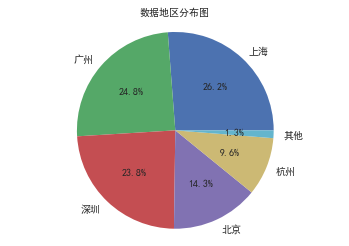

In [8]:
# pie chart of distribution of area location
area = middata['area'].value_counts()
area_tmp = area
cnt = area[area<200].sum()
area = area[area>=200]
area.loc[u'其他'] = cnt
pie = plt.pie(area, labels=area.index,autopct='%.1f%%')
plt.axis('equal')
plt.title(u'数据地区分布图', fontproperties="SimHei")
plt.savefig('pics1/area.pdf')
plt.show()

In [9]:
# mean salary of different cities
cities = ['area_上海','area_东莞','area_佛山','area_其他','area_北京','area_合肥','area_嘉兴','area_国外','area_天津','area_宁波','area_广东','area_广州','area_惠州','area_无锡','area_昆山','area_杭州','area_武汉','area_深圳','area_珠海','area_西安','area_香港']
dict = {}
for i in cities:
    tmp = data[data[i]==1]['salary_min'].mean()
    dict[i] = tmp
dict

{'area_上海': 116796.43895629764,
 'area_东莞': 112890.24390243902,
 'area_佛山': 108316.36363636363,
 'area_其他': 99329.76588628763,
 'area_北京': 118272.17587594465,
 'area_合肥': 119935.48387096774,
 'area_嘉兴': 117187.5,
 'area_国外': 175435.89743589744,
 'area_天津': 124846.15384615384,
 'area_宁波': 150943.3962264151,
 'area_广东': 152840.6779661017,
 'area_广州': 84662.7435591196,
 'area_惠州': 103000.0,
 'area_无锡': 101636.36363636363,
 'area_昆山': 98261.33333333333,
 'area_杭州': 105786.62952646239,
 'area_武汉': 108592.5925925926,
 'area_深圳': 101124.00260062651,
 'area_珠海': 170883.72093023255,
 'area_西安': 139680.0,
 'area_香港': 92000.0}

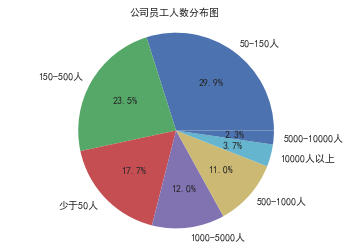

In [10]:
# pie chart of distribution of company size
people = middata['company_people'].value_counts()
pie = plt.pie(people, labels=people.index,autopct='%.1f%%')
plt.axis('equal')
plt.title(u'公司员工人数分布图', fontproperties="SimHei")
plt.savefig('pics1/company_people.pdf')
plt.show()

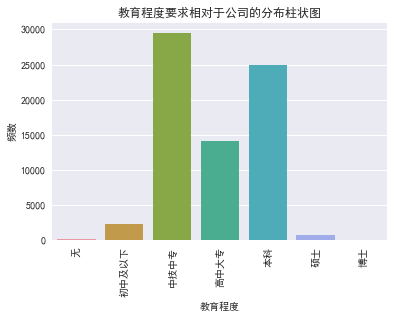

In [11]:
# column chart of distribution of education level
sns.countplot(data['education'])
plt.xticks([0,1,2,3,4,5,6], [u'无', u'初中及以下', u'中技中专', u'高中大专', u'本科', u'硕士', u'博士'], rotation=90)
plt.xlabel(u'教育程度', fontproperties="SimHei")
plt.ylabel(u'频数', fontproperties="SimHei")
plt.title(u'教育程度要求相对于公司的分布柱状图')
plt.savefig('pics1/edu.pdf')
plt.show()

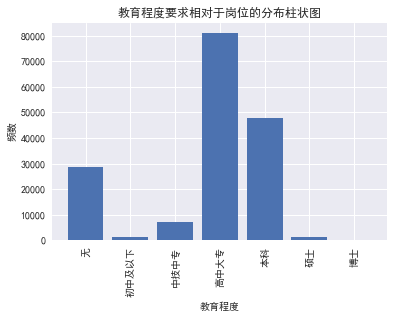

In [12]:
y = []
for i in [3,0,1,2,4,6,9]:
    cnt = data[data['education']==i]['hire_num'].sum()
    y.append(cnt)
plt.bar([u'无', u'初中及以下', u'中技中专', u'高中大专', u'本科', u'硕士', u'博士'], y)
plt.xticks(rotation=90)
plt.xlabel(u'教育程度', fontproperties="SimHei")
plt.ylabel(u'频数', fontproperties="SimHei")
plt.title(u'教育程度要求相对于岗位的分布柱状图')
plt.savefig('pics1/edu_mul_hire_num.pdf')
plt.show()

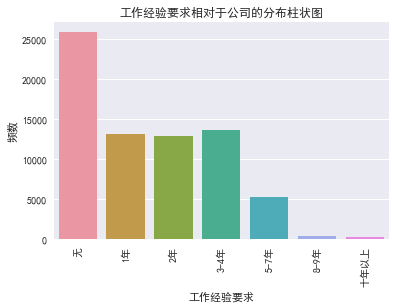

In [13]:
# column chart of distribution of work experience
sns.countplot(data['work_experience'])
plt.xticks([0,1,2,3,4,5,6], [u'无', u'1年', u'2年', u'3-4年', u'5-7年', u'8-9年', u'十年以上'], rotation=90)
plt.xlabel(u'工作经验要求')
plt.ylabel(u'频数')
plt.title(u'工作经验要求相对于公司的分布柱状图')
plt.savefig('pics1/work-experience.pdf')
plt.show()

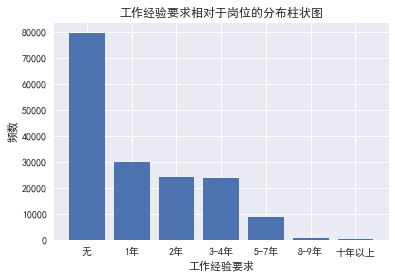

In [14]:
y = []
for i in [0,1,2,3.5,6.0,8.5,11]:
    cnt = data[data['work_experience']==i]['hire_num'].sum()
    y.append(cnt)
plt.bar([u'无', u'1年', u'2年', u'3-4年', u'5-7年', u'8-9年', u'十年以上'], y)
plt.xlabel(u'工作经验要求')
plt.ylabel(u'频数')
plt.title(u'工作经验要求相对于岗位的分布柱状图')
plt.savefig('pics1/work-experience_mul_hire-num.pdf')
plt.show()

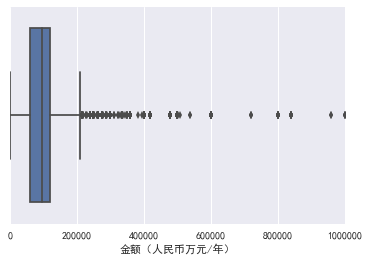

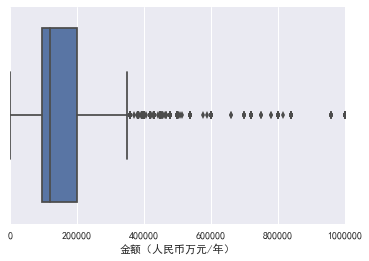

/home/zqz/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


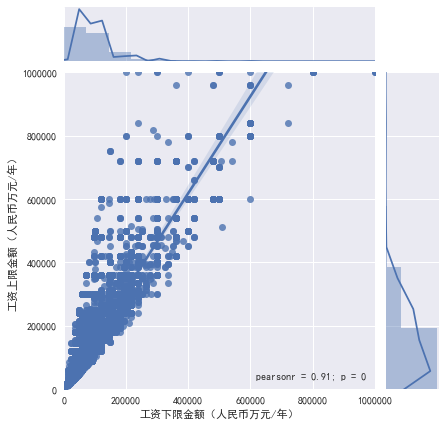

In [15]:
# distribution of salary
sns.boxplot(data['salary_min'])
plt.xlabel(u'金额（人民币万元/年）')
plt.xlim(0,1000000);
plt.savefig('pics1/salary_min.pdf')
plt.show()
sns.boxplot(data['salary_max'])
plt.xlabel(u'金额（人民币万元/年）')
plt.xlim(0,1000000);
plt.savefig('pics1/salary_max.pdf')
plt.show()
sns.jointplot("salary_min", "salary_max", data=data, kind='reg')
plt.xlabel(u'工资下限金额（人民币万元/年）')
plt.ylabel(u'工资上限金额（人民币万元/年）')
plt.xlim(0,1000000);
plt.ylim(0,1000000);
plt.savefig('pics1/salary.pdf')
plt.show()  

/home/zqz/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 1440x432 with 0 Axes>

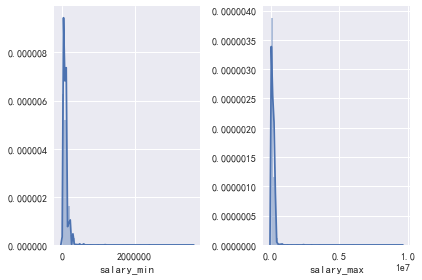

In [16]:
plt.figure(figsize=(20,6))
f, axes = plt.subplots(1, 2)
sns.distplot(data['salary_min'], ax=axes[0])
plt.tight_layout()
sns.distplot(data['salary_max'], ax=axes[1])
plt.tight_layout()
#sns.kdeplot(data['salary_min'], data['salary_max'], shade=True,legend=["min", "max"])

plt.savefig('pics1/salary_density.pdf')
plt.show()

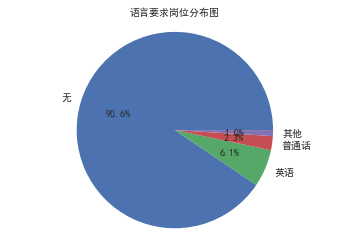

In [17]:
# pie chart of distribution of language ability requirements
language = middata['language_2'].append(middata['language_1']).value_counts()
cnt = language[language<500].sum()
language = language[language>=500]
language.loc[u'其他'] = cnt
pie = plt.pie(language, labels=language.index,autopct='%.1f%%')
plt.axis('equal')
plt.title(u'语言要求岗位分布图', fontproperties="SimHei")
plt.savefig('pics1/language.pdf')
plt.show()

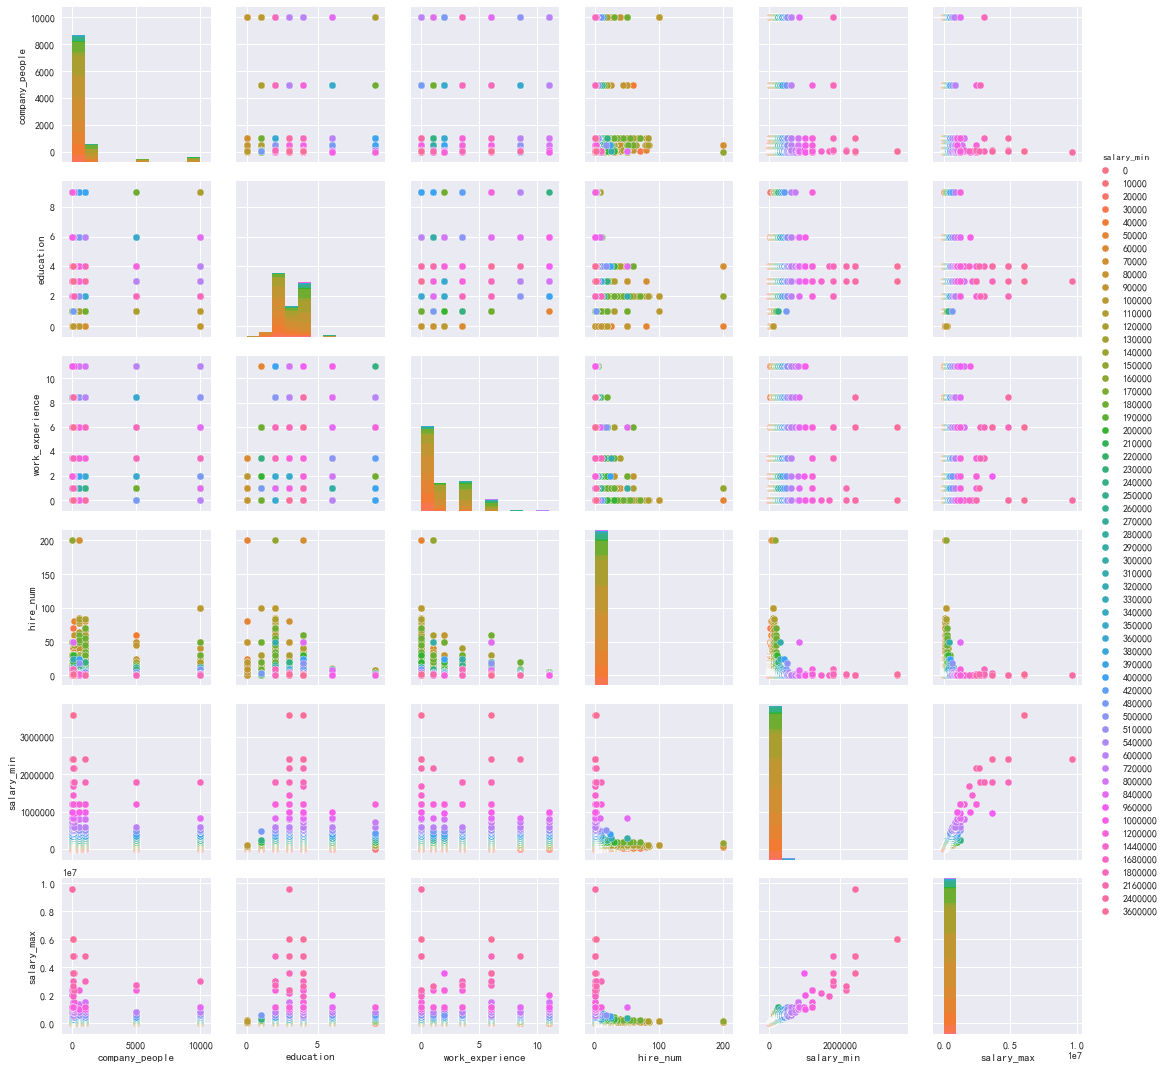

In [24]:
# pair features
tdata = data
tdata['salary_min'] = tdata['salary_min'].map(lambda x: x//10000*10000)
tdata['salary_max'] = tdata['salary_max'].map(lambda x: x//10000*10000)
tdata
sns.pairplot(tdata[['company_people', 'education', 'work_experience', 'hire_num', 'salary_min','salary_max']],hue='salary_min')
plt.savefig('pics1/pair_salary.png')
plt.show()

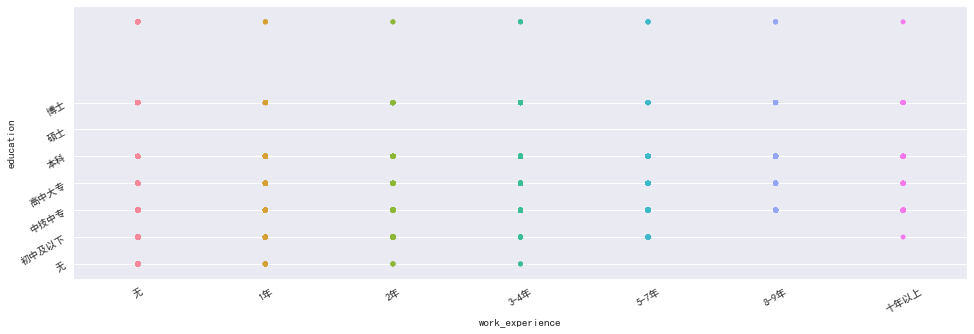

In [19]:
# education and work experience
plt.figure(figsize=(16,5))
tmp_data = data[['education', 'work_experience']].sort_values(by='education')
sns.stripplot(x='work_experience',y="education",data=tmp_data)
plt.xticks([0,1,2,3,4,5,6], [u'无', u'1年', u'2年', u'3-4年', u'5-7年', u'8-9年', u'十年以上'], rotation=30)
plt.yticks([0,1,2,3,4,5,6], [u'无', u'初中及以下', u'中技中专', u'高中大专', u'本科', u'硕士', u'博士'], rotation=30)
plt.savefig('pics1/edu_work-experience.pdf')
plt.show()

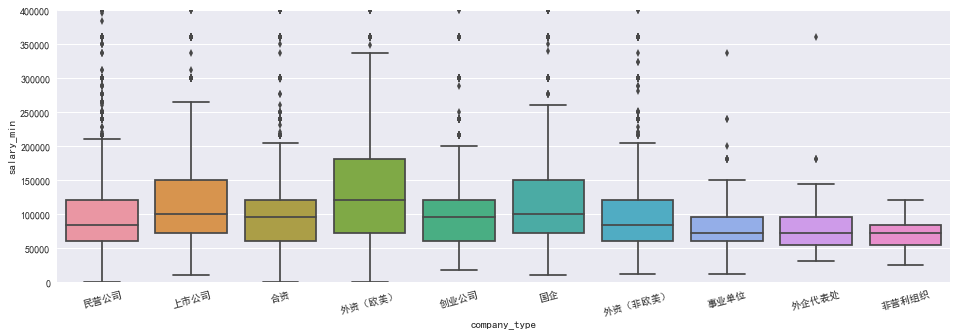

In [20]:
# company type and salary
plt.figure(figsize=(16,5))
sns.boxplot(x='company_type',y=u'salary_min',data=middata)
plt.ylim(0,400000)
plt.xticks(rotation=15)
plt.savefig('pics1/company-type_salary.pdf')
plt.show()

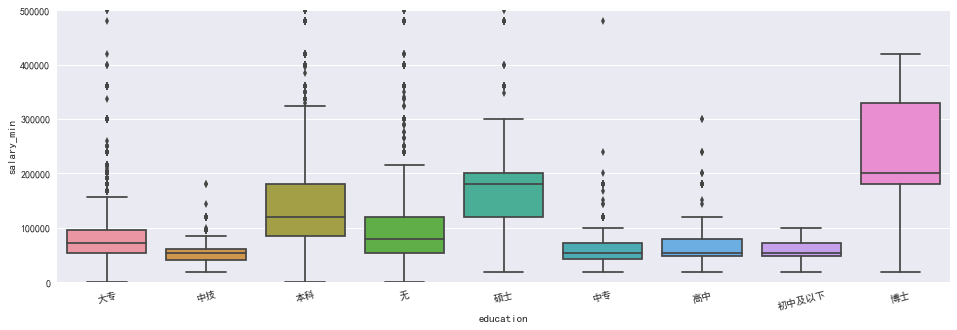

In [21]:
# education level and salary
plt.figure(figsize=(16,5))
sns.boxplot(x='education',y=u'salary_min',data=middata)
plt.ylim(0,500000)
plt.xticks(rotation=15)
plt.savefig('pics1/education_salary.pdf')
plt.show()

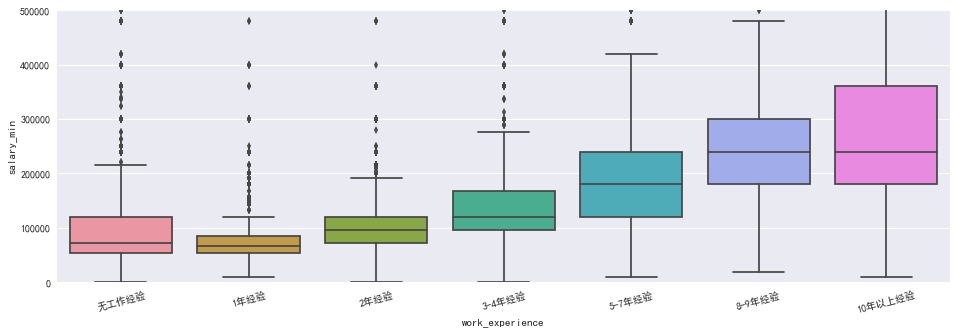

In [22]:
# work experience and salary
plt.figure(figsize=(16,5))
sns.boxplot(x='work_experience',y=u'salary_min',data=middata)
plt.ylim(0,500000)
plt.xticks(rotation=15)
plt.savefig('pics1/work_experience_salary.pdf')
plt.show()

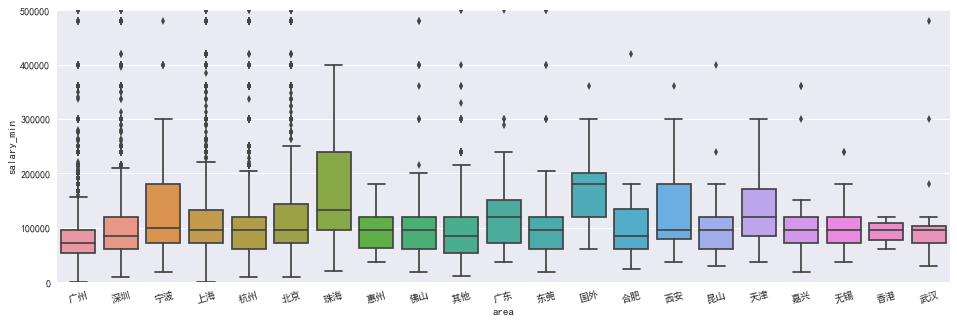

In [23]:
# location and salary
#cities = ['area_上海','area_东莞','area_佛山','area_其他','area_北京','area_合肥','area_嘉兴','area_国外','area_天津','area_宁波','area_广东','area_广州','area_惠州','area_无锡','area_昆山','area_杭州','area_武汉','area_深圳','area_珠海','area_西安','area_香港']
plt.figure(figsize=(16,5))
sns.boxplot(x='area',y=u'salary_min',data=middata)
plt.ylim(0,500000)
plt.xticks(rotation=15)
plt.savefig('pics1/area_salary.pdf')
plt.show()